In [15]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data = r"C:\Users\user\Desktop\database exercises\sales_data.csv"

In [89]:
df_raw = pd.read_csv(data)

In [90]:
df_raw.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
#df = pd.read_csv(data)

In [ ]:
### CLEANING CATEGORIES.. 

In [180]:
df.head()

,Country,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,Canada,4,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,Canada,4,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,Australia,4,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,Australia,4,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,Australia,4,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [101]:
df =  df.drop(['Customer_Age','Month','Year','Age_Group','Date'],axis=1)

KeyError: "['Customer_Age' 'Month' 'Year' 'Age_Group' 'Date'] not found in axis"

In [87]:
df =  df.drop(['Product_Category'],axis=1)

In [103]:
df = df.drop(['State'],axis=1)

In [52]:
df['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [53]:
missing_val = df.isnull().sum()

In [54]:
missing_val

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [55]:
sns.set(rc = {'figure.figsize':(40,25)})

In [80]:
df.corr()

,Day,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Order_Quantity,-0.002412,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


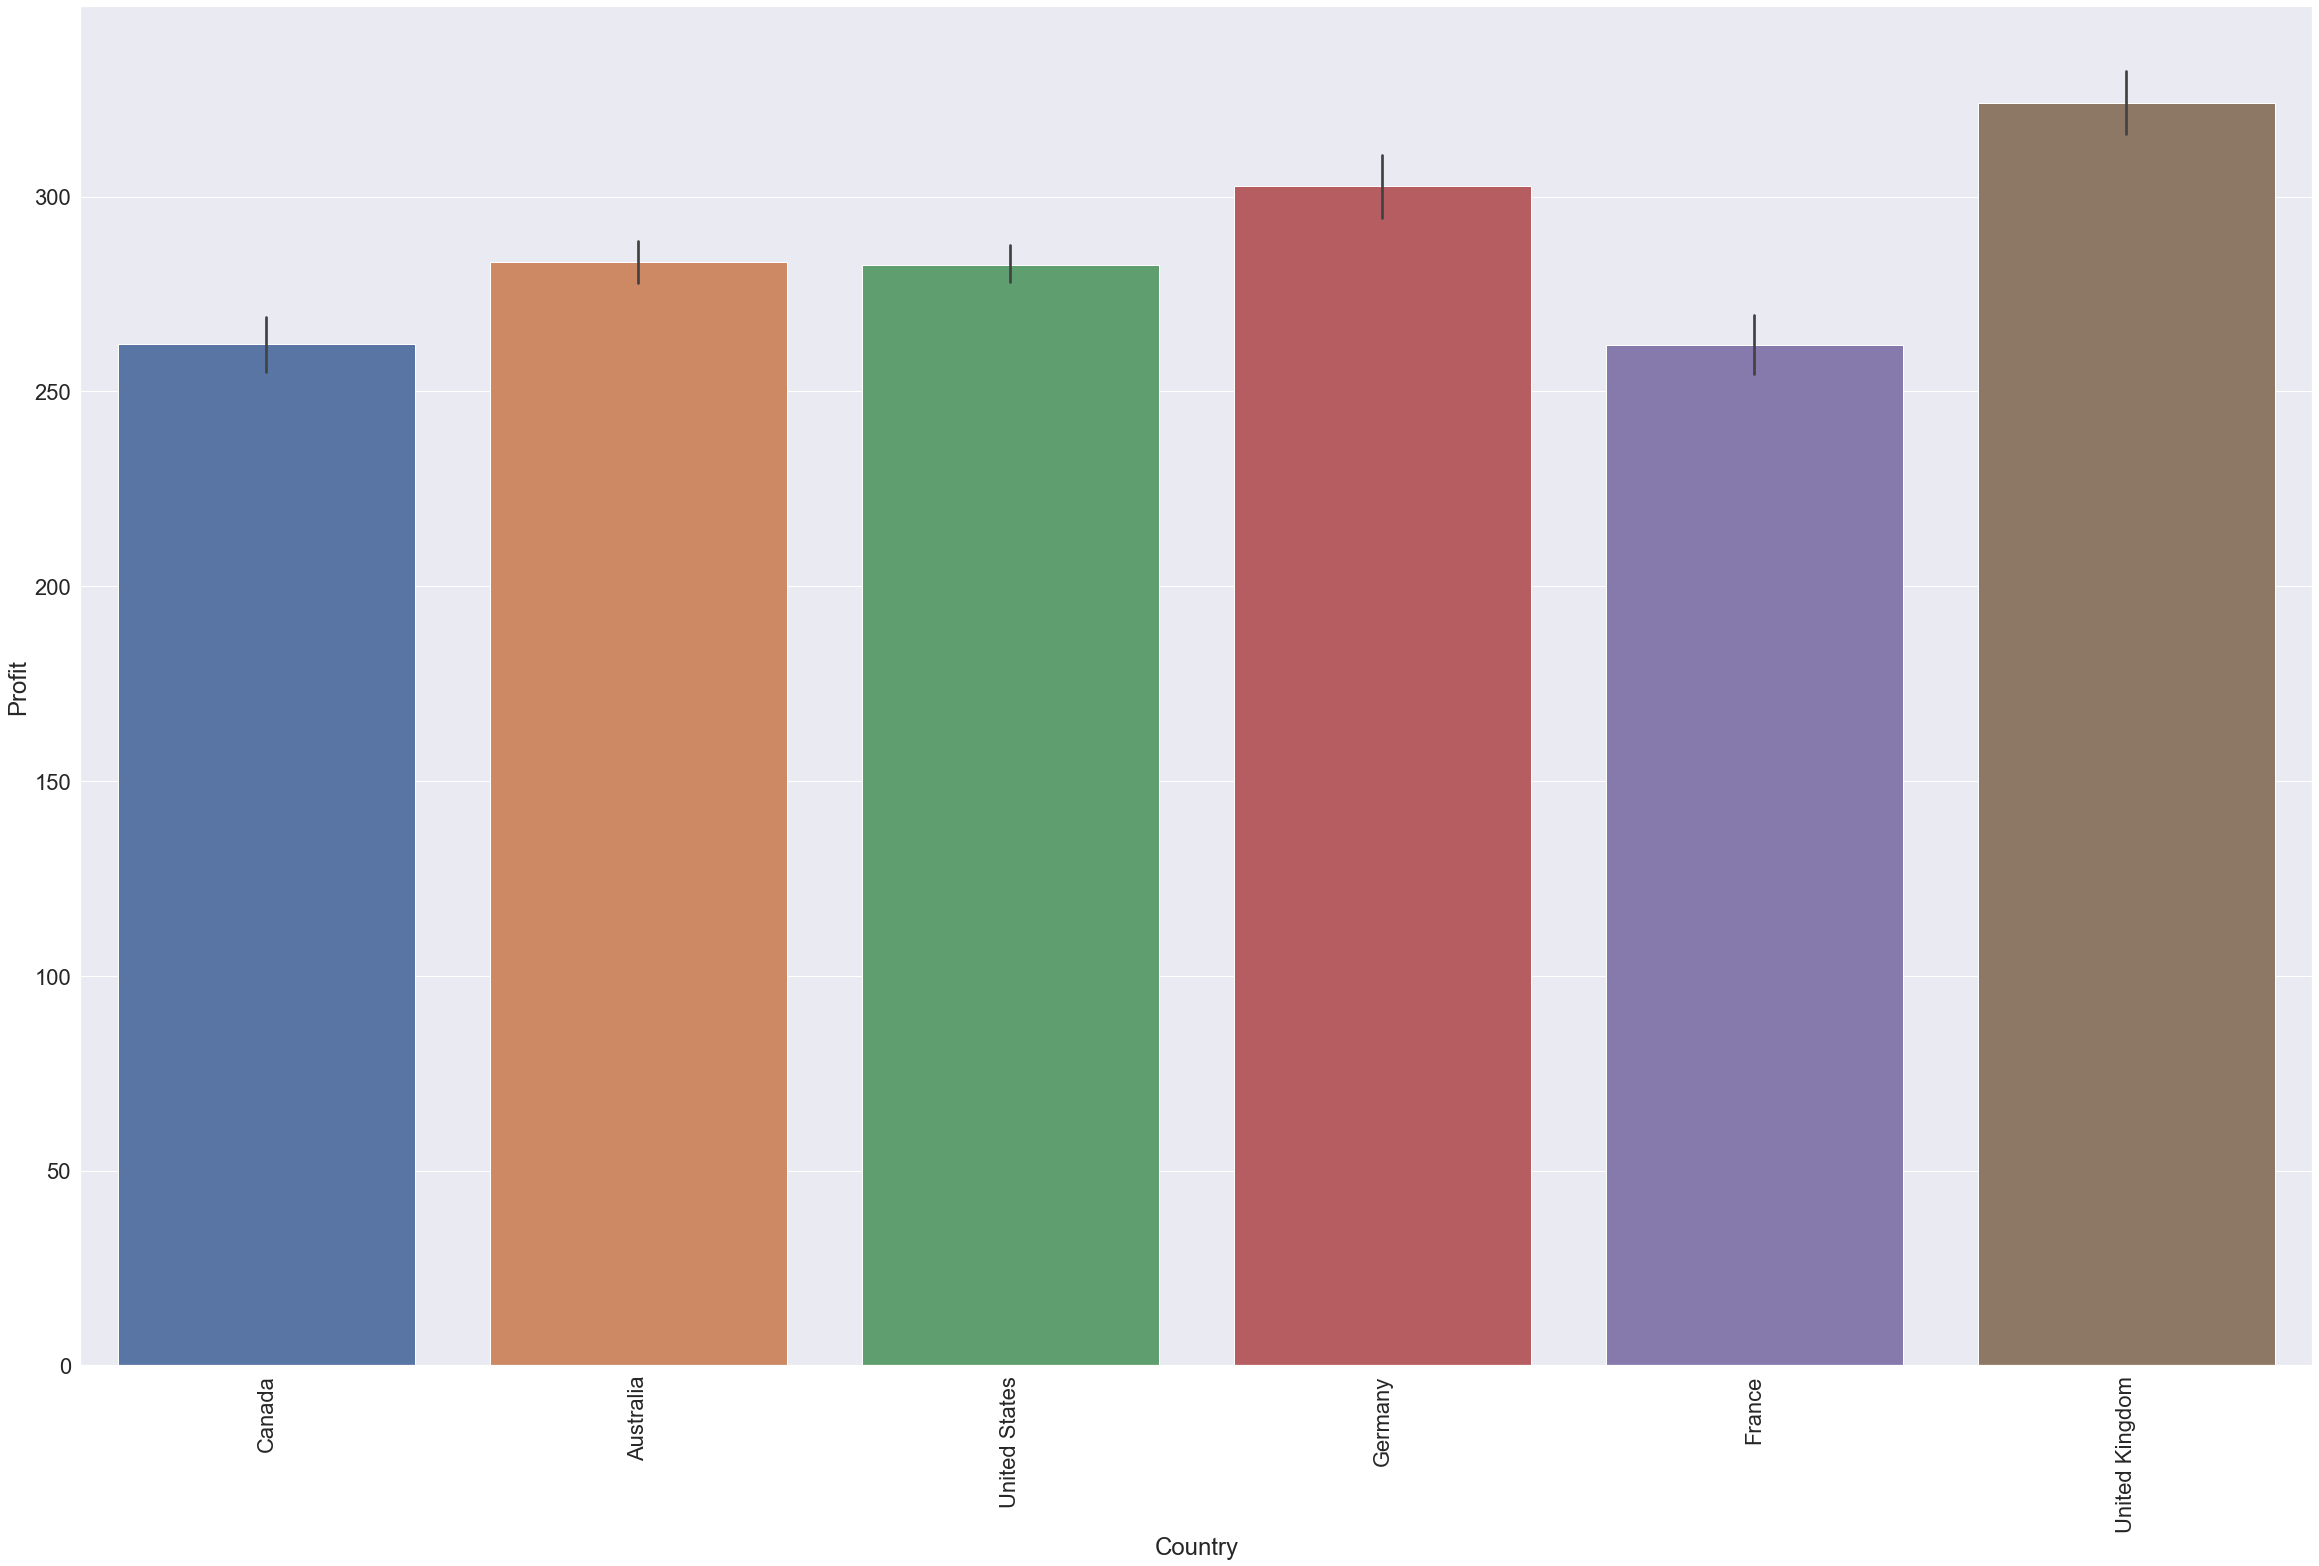

In [92]:
ax = sns.barplot(x = df['Country'],y = df['Profit'],data=df)
ax.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='Product', ylabel='Profit'>

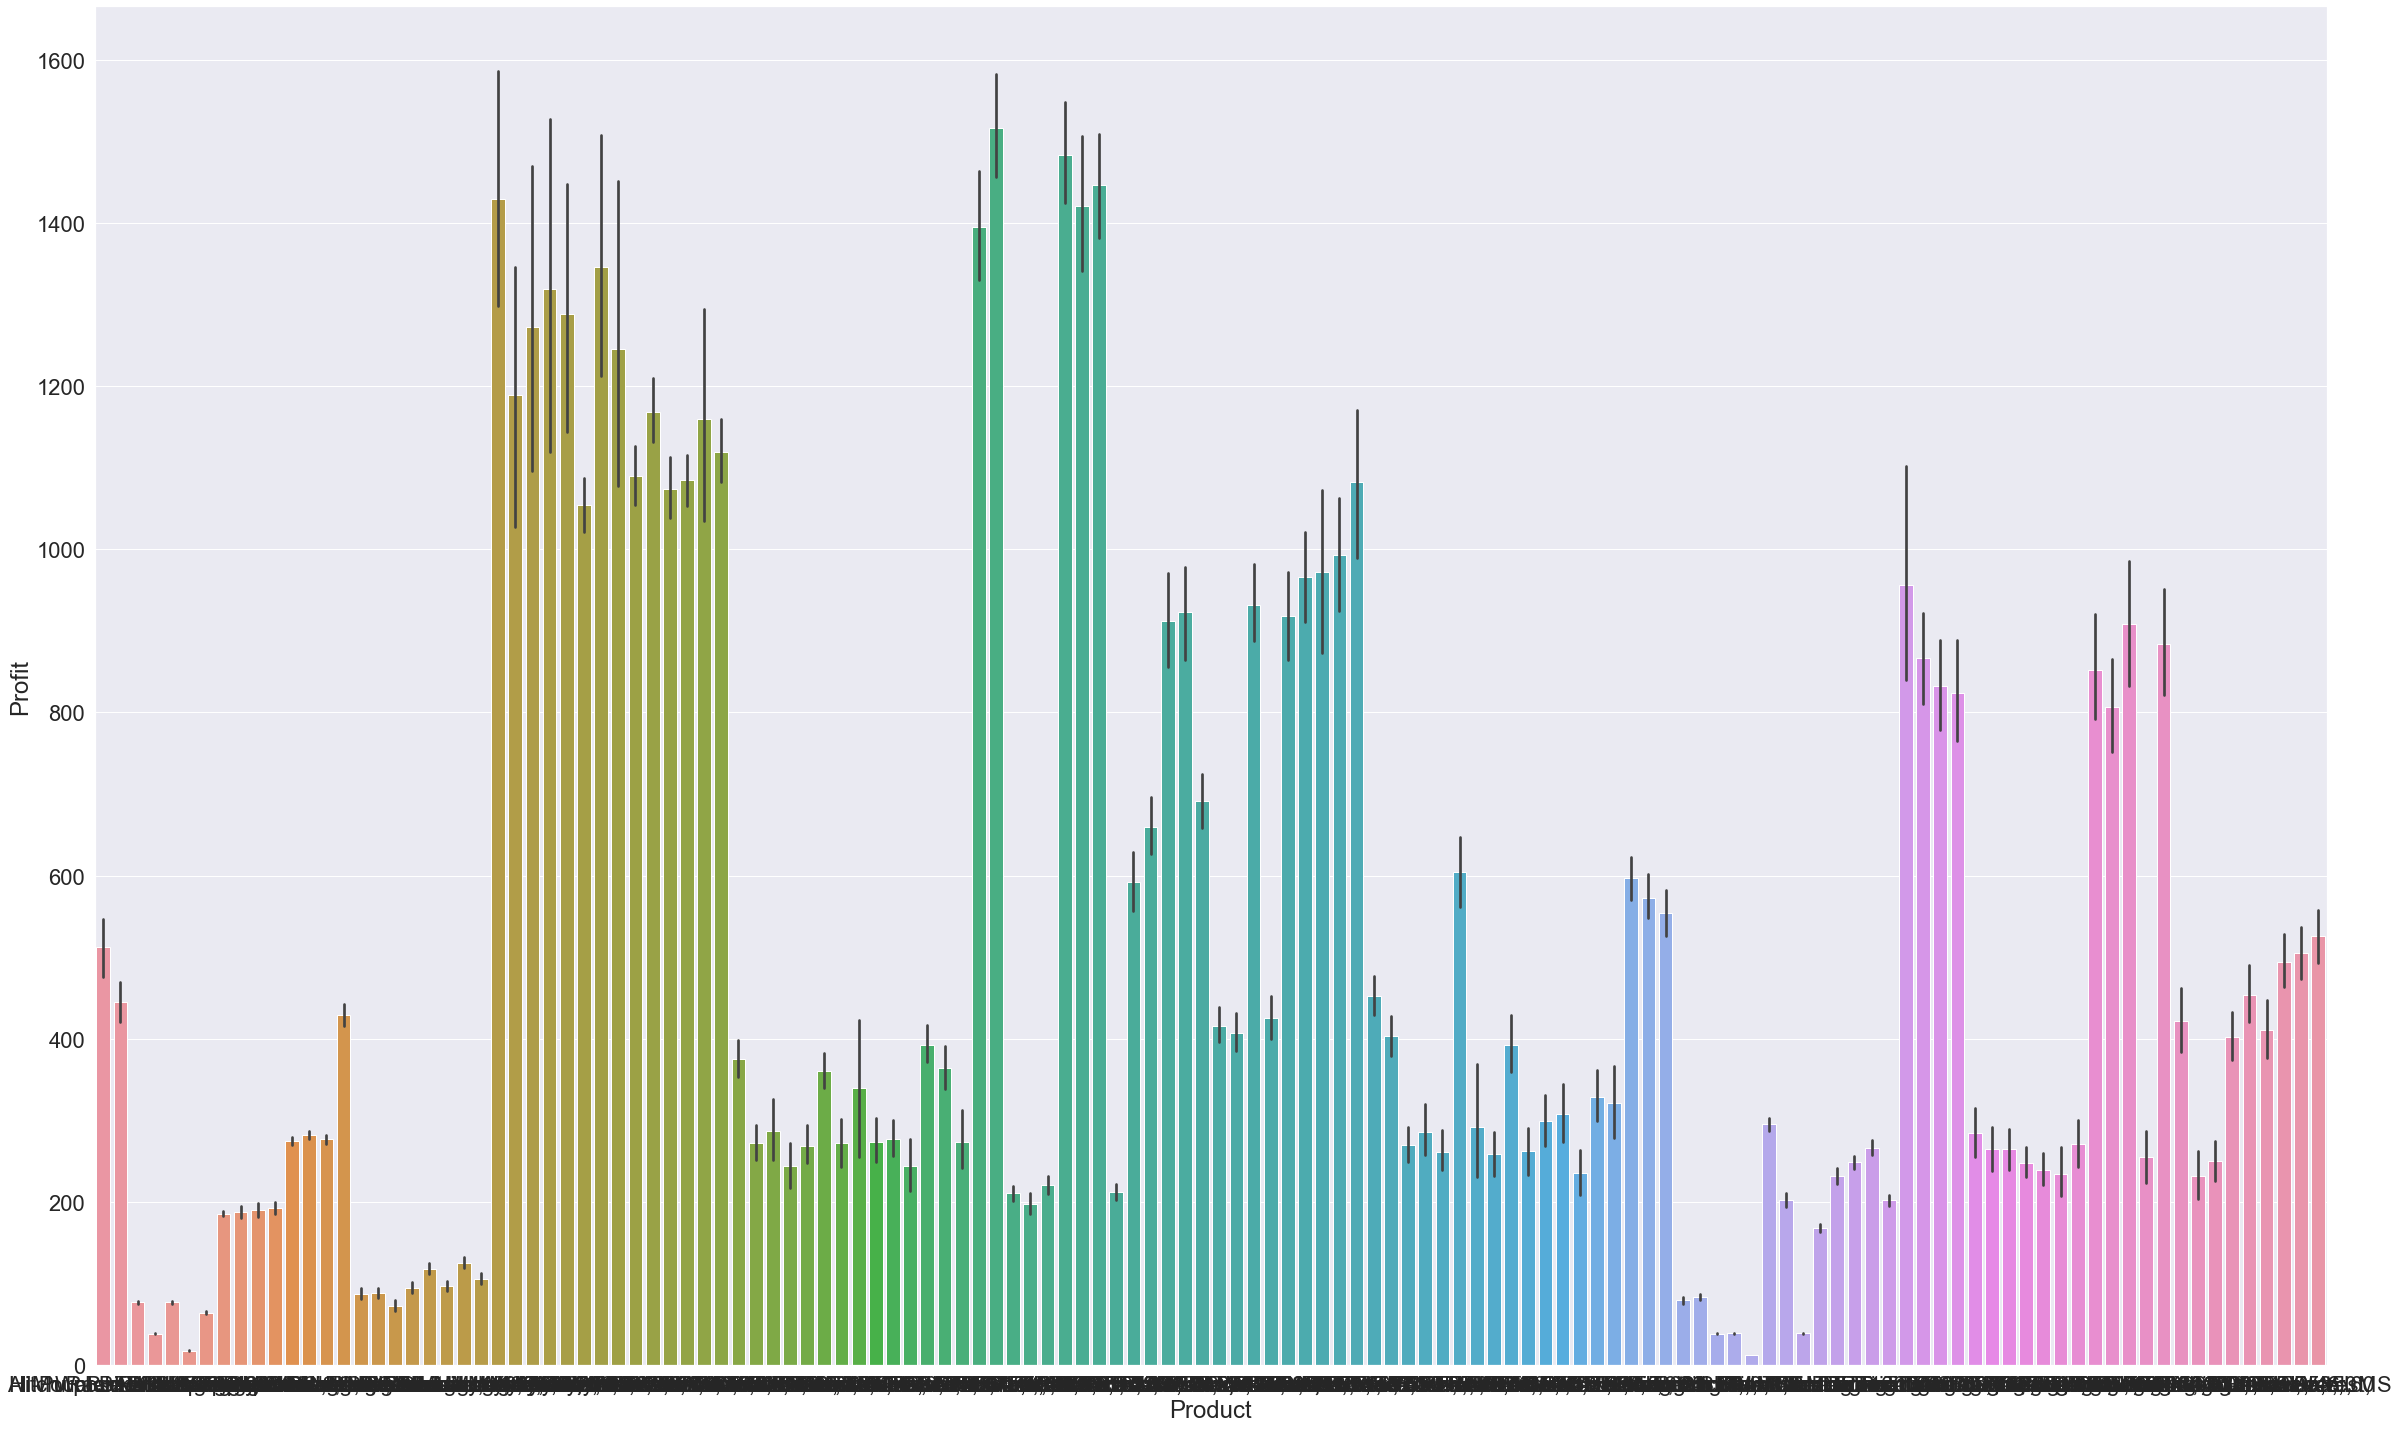

In [97]:
sns.barplot(x = df['Product'],y = df['Profit'],data=df)

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

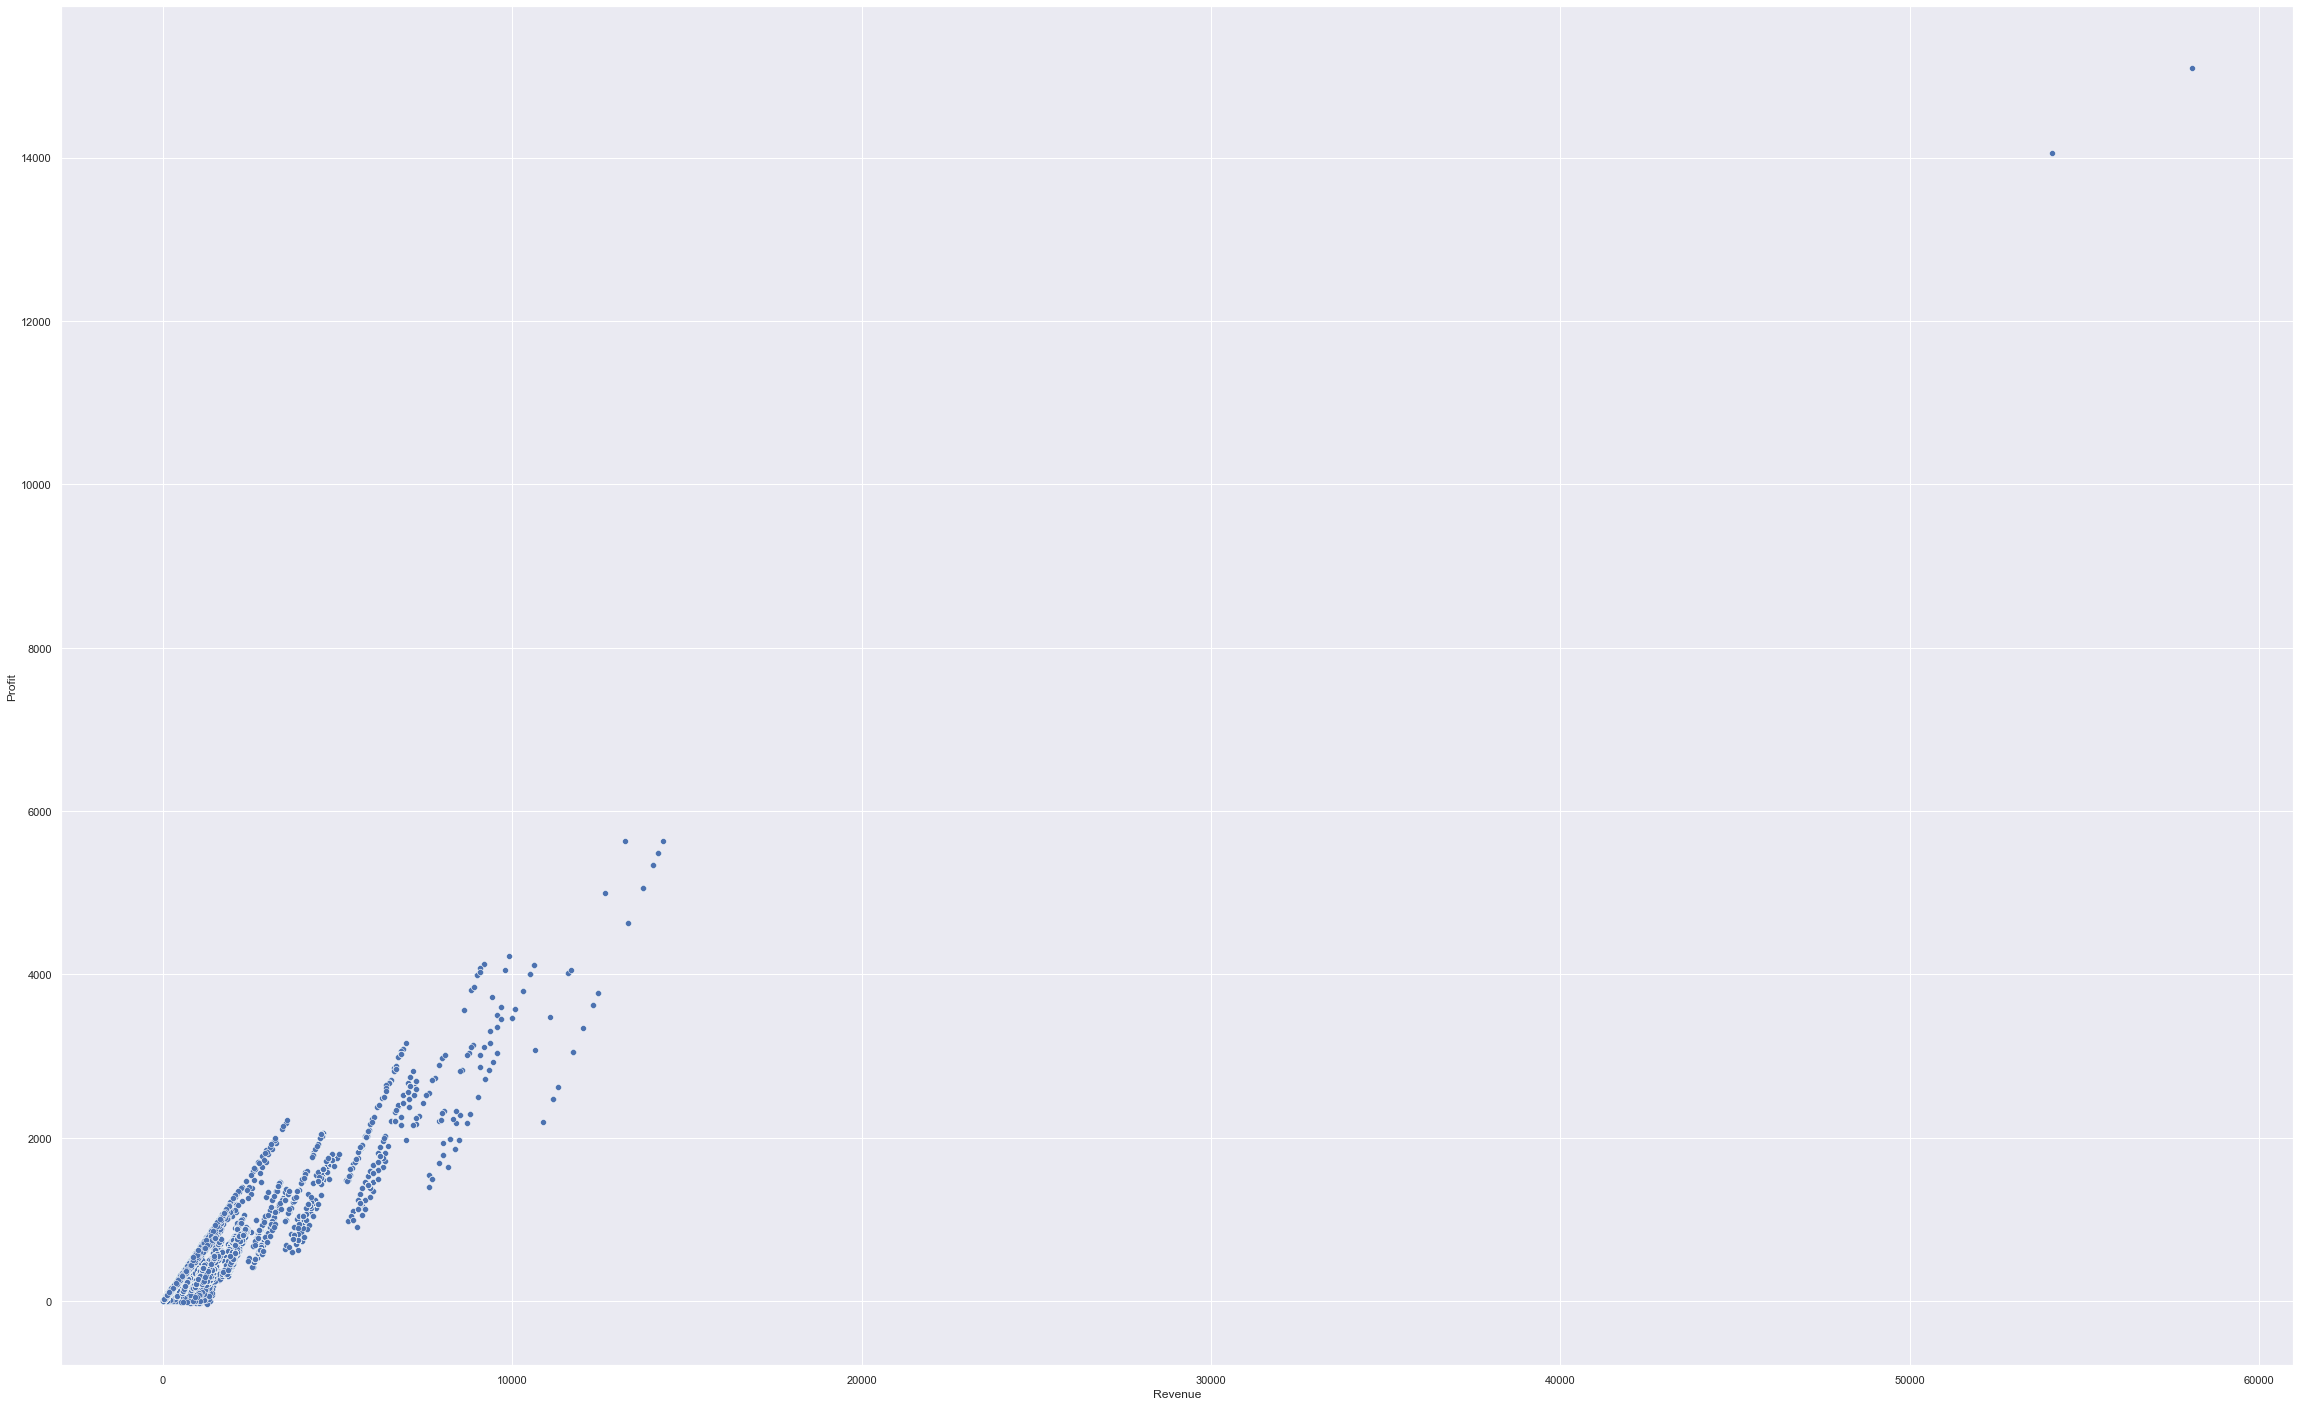

In [58]:
sns.scatterplot(x = df['Revenue'],y = df['Profit'],data=df)

In [62]:
sns.set(font_scale=2)

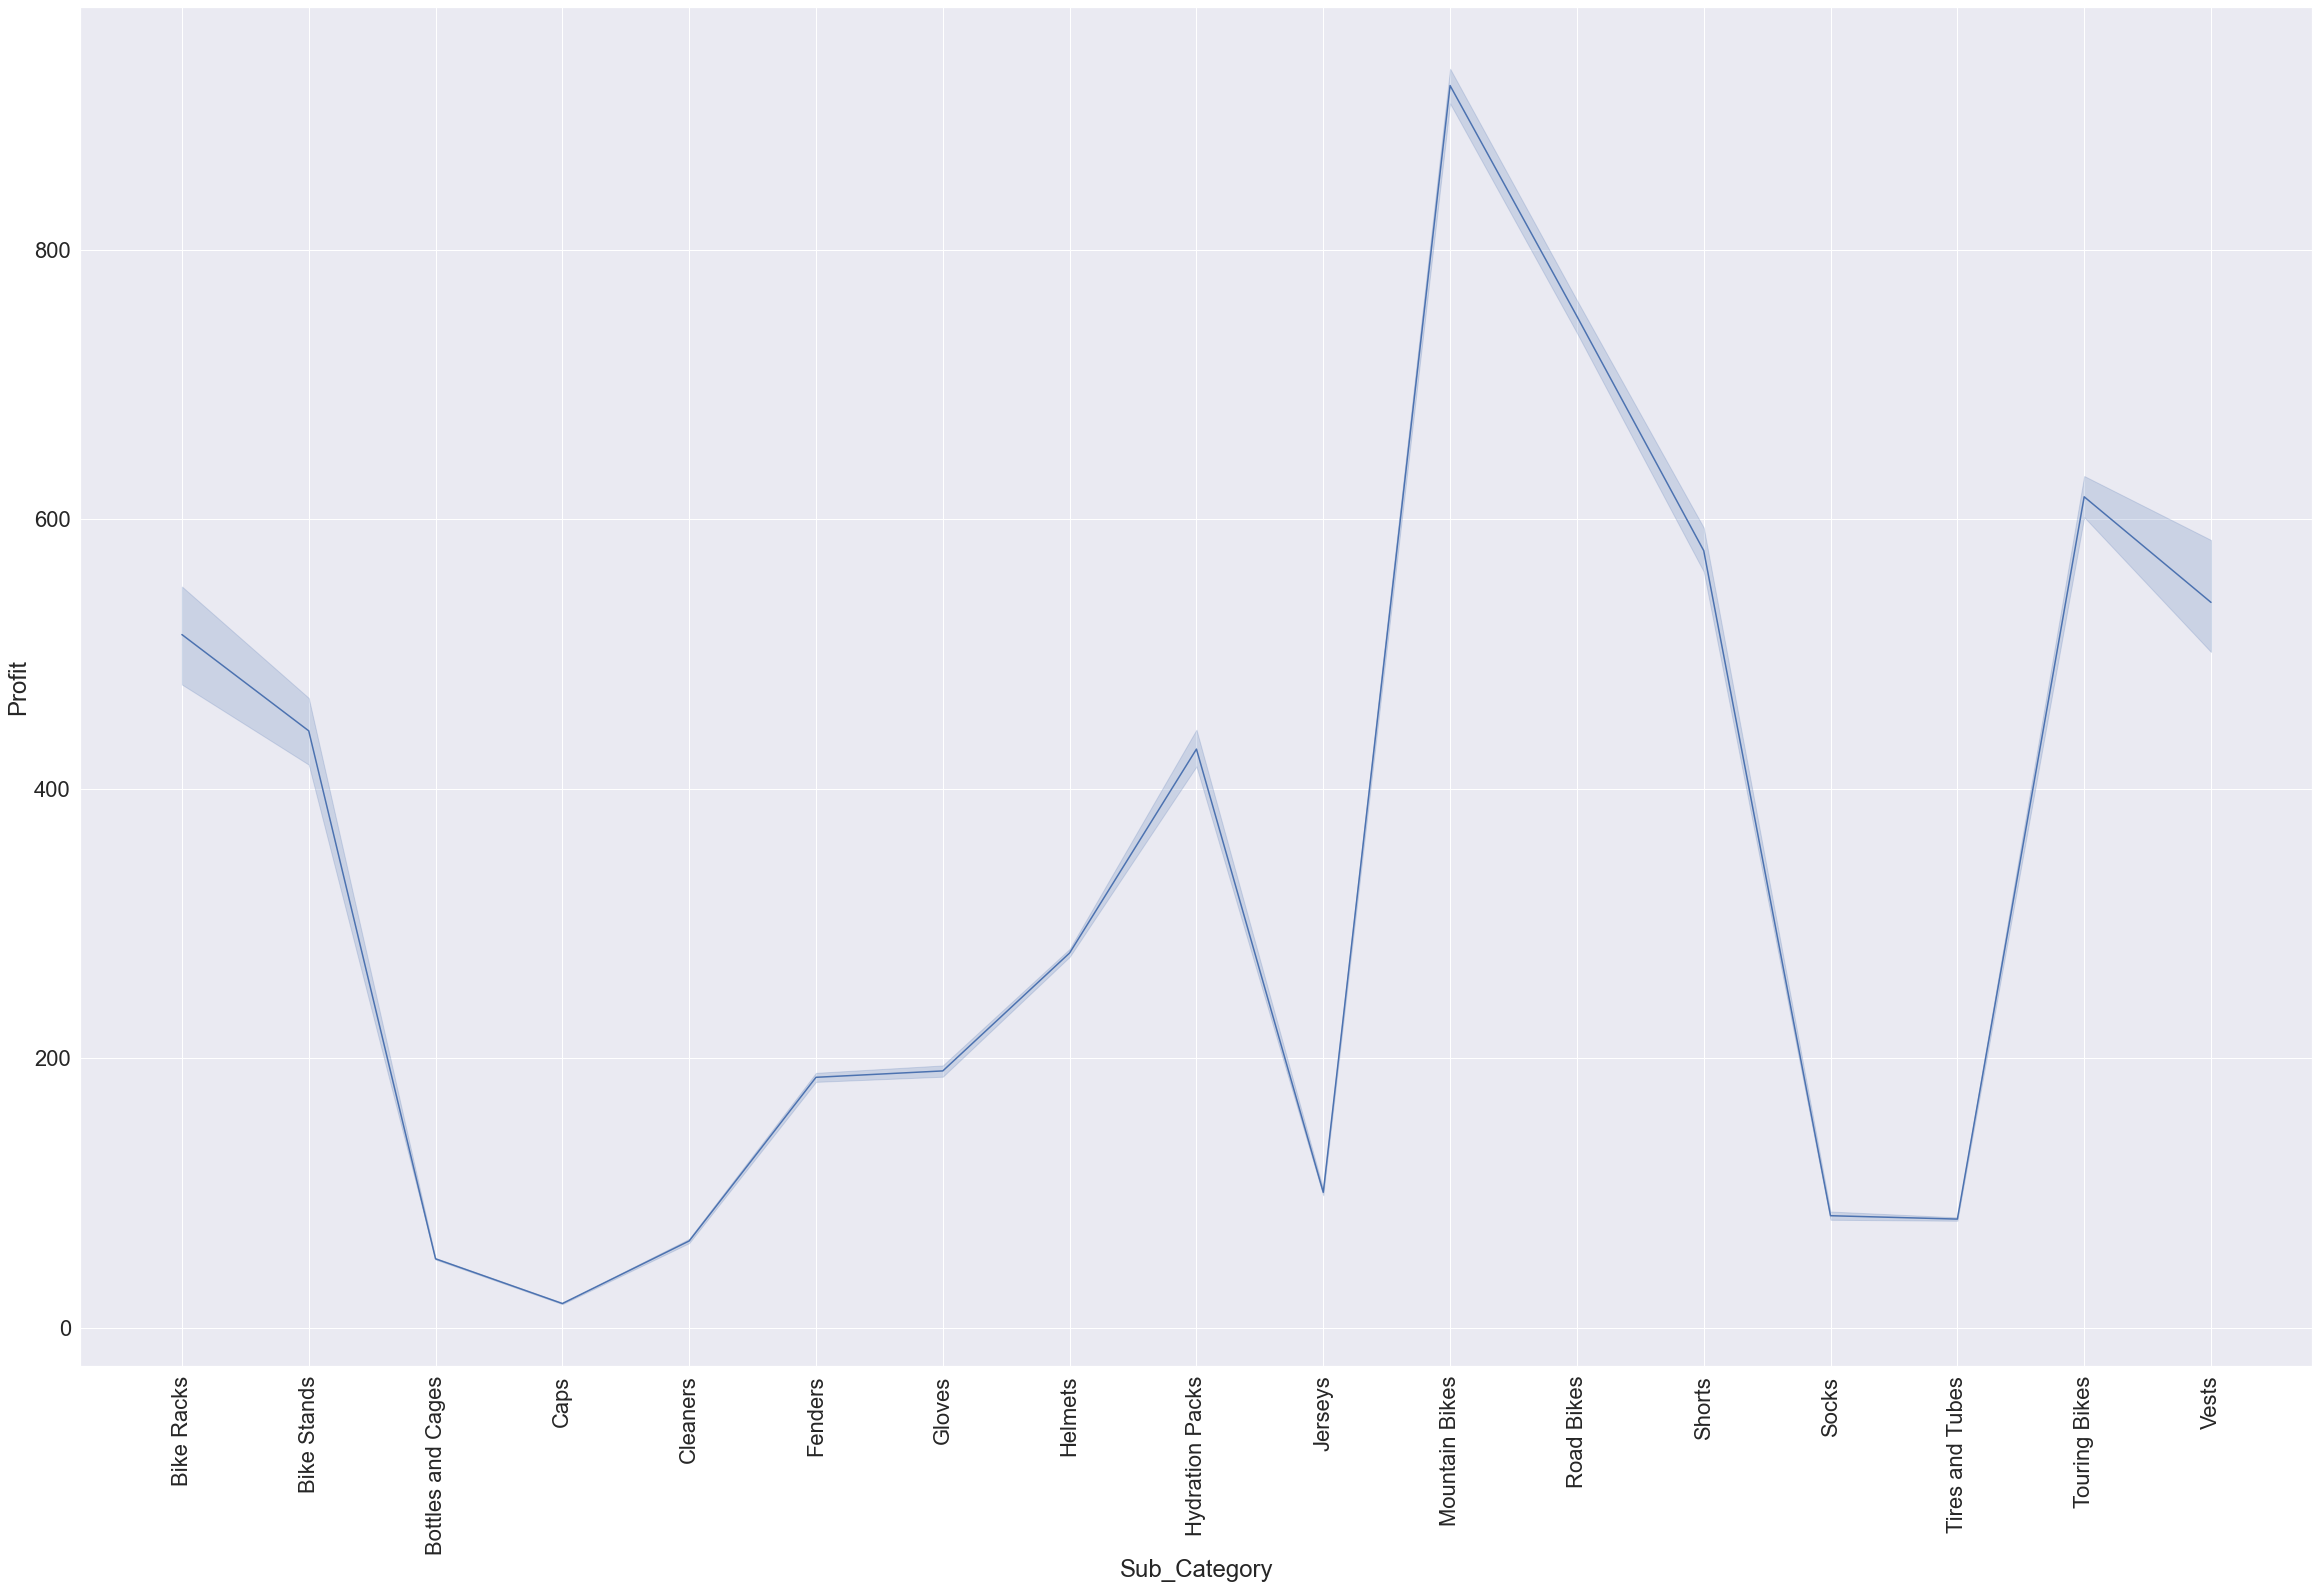

In [63]:
ax = sns.lineplot(x = df['Sub_Category'],y = df['Profit'],data=df)
ax.tick_params(axis='x', rotation=90)

### ENCODING CORELATION DATA ( i can see correlation above so i will enumerate categories manually for better
### algorithm evaluation


In [68]:
df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [156]:
grade_subC = {'Sub_Category':{'Bike Racks':4,'Bike Stands':3,
                              'Bottles and Cages':1,'Caps':0,'Cleaners':1,
                              'Fenders':2,'Gloves':3,'Helmets':4,'Hydration Packs':3,'Jerseys':1,'Mountain Bikes':6,
                             'Road Bikes':5,'Shorts':4,'Socks':2,'Tires and Tubes':2,'Touring Bikes':4,'Vests':4}}

In [157]:
df = df.replace(grade_subC)

In [158]:
df.head(5)

,Country,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,Canada,4,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,Canada,4,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,Australia,4,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,Australia,4,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,Australia,4,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [159]:
df_clean = df

In [160]:
final_df = df_clean

In [161]:
df_clean.head(5)

,Country,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,Canada,4,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,Canada,4,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,Australia,4,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,Australia,4,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,Australia,4,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [169]:
df_clean.tail(5)

,Country,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,United Kingdom,4,3,24,64,112,72,184
113032,Australia,4,22,24,64,655,528,1183
113033,Australia,4,22,24,64,655,528,1183
113034,France,4,24,24,64,684,576,1260
113035,France,4,23,24,64,655,552,1207


In [170]:
from sklearn.preprocessing import OneHotEncoder

In [171]:
encoder = OneHotEncoder()
encoder_result = encoder.fit_transform(df_clean[['Country']])

In [172]:
#pd.DataFrame(encoder_result.toarray(), columns=encoder.categories_).head()

In [173]:
df_clean = df_clean.join(pd.DataFrame(encoder_result.toarray(), columns=encoder.categories_))

In [178]:
df_clean.head()

,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,"(Australia,)","(Canada,)","(France,)","(Germany,)","(United Kingdom,)","(United States,)"
0,4,8,45,120,590,360,950,0.0,1.0,0.0,0.0,0.0,0.0
1,4,8,45,120,590,360,950,0.0,1.0,0.0,0.0,0.0,0.0
2,4,23,45,120,1366,1035,2401,1.0,0.0,0.0,0.0,0.0,0.0
3,4,20,45,120,1188,900,2088,1.0,0.0,0.0,0.0,0.0,0.0
4,4,4,45,120,238,180,418,1.0,0.0,0.0,0.0,0.0,0.0


In [184]:
df_fin = df_clean

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [183]:
df_fin.dtypes

Sub_Category           int64
Order_Quantity         int64
Unit_Cost              int64
Unit_Price             int64
Profit                 int64
Cost                   int64
Revenue                int64
(Australia,)         float64
(Canada,)            float64
(France,)            float64
(Germany,)           float64
(United Kingdom,)    float64
(United States,)     float64
dtype: object

In [185]:
df_fin['target'] = df_fin['Profit']

In [189]:
profit = df_fin.drop(['Profit'],axis =1)

In [190]:
profit.head()

,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,"(Australia,)","(Canada,)","(France,)","(Germany,)","(United Kingdom,)","(United States,)",target
0,4,8,45,120,360,950,0.0,1.0,0.0,0.0,0.0,0.0,590
1,4,8,45,120,360,950,0.0,1.0,0.0,0.0,0.0,0.0,590
2,4,23,45,120,1035,2401,1.0,0.0,0.0,0.0,0.0,0.0,1366
3,4,20,45,120,900,2088,1.0,0.0,0.0,0.0,0.0,0.0,1188
4,4,4,45,120,180,418,1.0,0.0,0.0,0.0,0.0,0.0,238


In [212]:
(profit_train_ftrs,profit_test_ftrs,
profit_train_tgt,profit_test_tgt) = train_test_split(profit.iloc[:,:-1:],profit.target,test_size=0.3,random_state=42)

In [213]:
lr = LinearRegression()
fit = lr.fit(profit_train_ftrs,profit_train_tgt)
predict = fit.predict(profit_test_ftrs)

In [219]:
knn = KNeighborsRegressor(n_neighbors=3)
fit_kn = knn.fit(profit_train_ftrs,profit_train_tgt)
predict_kn = fit.predict(profit_test_ftrs)

In [215]:
eval = mean_squared_error(profit_test_tgt,predict)

In [220]:
eval_knn = mean_squared_error(profit_test_tgt,predict_kn)

In [223]:
eval

1.3064028619615564e-23

In [224]:
print(eval_knn)

1.3064028619615564e-23


In [217]:
test = [[4,8,45,120,360,950,0.0,1.0,0.0,0.0,0,0]]

In [218]:
lr.predict(test)

array([590.])